In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import quandl
import statsmodels.formula.api as smf
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import DateFormatter

In [2]:
#PIPE para baixar os arquivos da plataforma quandl

#quandl.ApiConfig.api_key = "key-code"

[]

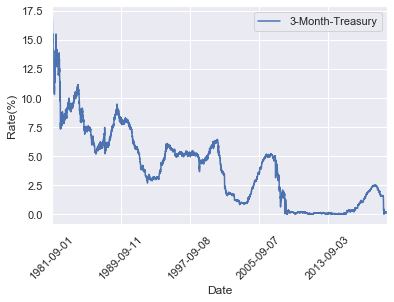

In [3]:
###3-month Treasury Constant Maturity Rate
#https://www.quandl.com/data/FRED/DGS3MO-3-Month-Treasury-Constant-Maturity-Rate
#DGS3=quandl.get("FRED/DGS3MO")
#DGS3.to_csv('FRED_DGS3_2020_08_03.csv')

#Importar o arquivo salva em csv
DGS3=pd.read_csv('FRED_DGS3_2020_08_03.csv', index_col=0)
sns.set(style="darkgrid")
DGS3.plot()
plt.legend(('3-Month-Treasury','FRED'))
plt.ylabel('Rate(%)')
plt.xticks(rotation=45)
plt.plot()


In [4]:
DGS3.head()

,Value
Date,
1981-09-01,17.01
1981-09-02,16.65
1981-09-03,16.96
1981-09-04,16.64
1981-09-08,16.54


In [5]:
data=pd.read_excel('wti_impa.xlsx', index_col=0)
data.head(-1)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
Date,,,,,,,,,,,,,,,,,,,,
1996-01-03,19.89,19.34,18.90,18.58,18.35,18.16,18.01,17.92,17.84,17.77,17.71,17.67,17.63,17.58,17.54,17.50,17.46,17.43,17.40,17.38
1996-01-10,19.67,19.18,18.78,18.47,18.24,18.06,17.91,17.82,17.74,17.66,17.60,17.57,17.54,17.49,17.45,17.41,17.37,17.34,17.32,17.30
1996-01-17,18.52,18.05,17.79,17.60,17.45,17.35,17.27,17.21,17.16,17.11,17.06,17.05,17.03,17.00,16.97,16.94,16.93,16.92,16.91,16.91
1996-01-23,18.06,17.67,17.47,17.32,17.22,17.15,17.09,17.04,16.99,16.94,16.93,16.91,16.88,16.85,16.82,16.81,16.80,16.79,16.79,16.81
1996-01-24,18.28,17.88,17.67,17.52,17.41,17.32,17.26,17.20,17.14,17.08,17.07,17.05,17.02,16.99,16.96,16.95,16.94,16.93,16.93,16.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-25,51.53,53.23,54.55,55.74,56.83,57.76,58.46,59.07,59.64,60.12,60.58,61.04,61.46,61.81,62.12,62.34,62.54,62.73,62.92,63.13
2015-04-01,50.76,52.55,53.99,55.25,56.34,57.24,57.91,58.51,59.07,59.53,59.96,60.38,60.77,61.11,61.42,61.65,61.87,62.08,62.30,62.53
2015-04-08,49.93,51.76,53.40,54.75,55.93,56.87,57.58,58.21,58.80,59.26,59.68,60.01,60.48,60.84,61.21,61.59,61.72,61.77,62.30,62.54


Text(0, 0.5, 'Price - $')

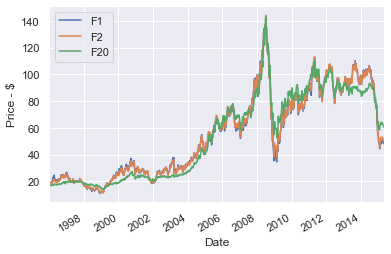

In [6]:
data['F1'].plot()
data['F2'].plot()
data['F20'].plot()
plt.legend(('F1','F2', 'F20'))
plt.ylabel('Price - $')

[]

<Figure size 432x288 with 0 Axes>

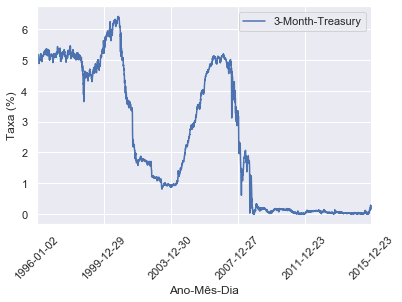

In [17]:
sns.despine(left=True)
DGS3['1996':'2016'].plot()
plt.legend(('3-Month-Treasury','FRED'))
plt.ylabel('Taxa (%)')
plt.xlabel('Ano-Mês-Dia')
#plt.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
#plt.xaxis.set_minor_formatter(mdates.DateFormatter("%Y"))
#plt.x
plt.xticks(rotation=45)
plt.plot()


In [31]:
print('A média é:',np.mean(DGS3['1996':'2016'])[0], '%')
print('O desvio padrão é:',np.std(DGS3['1996':'2016'])[0],'%')

A média é: 2.4056232520975214 %
O desvio padrão é: 2.212553955744856 %


In [32]:
r=np.mean(DGS3['1996':'2016'])[0]/100
print(r)

0.024056232520975215


In [120]:
data['Y']= r -12*np.log(data.F2/data.F1)

Text(0.5, 0, 'Ano')

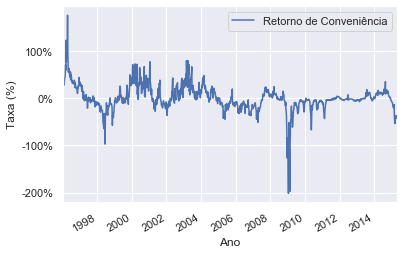

In [121]:
data['Y'].plot()
plt.ylabel('Taxa (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(('Retorno de Conveniência','Reversão'))
plt.xlabel('Ano')

In [122]:
print('Valor máximo é:',np.max(data['Y']))
print('Valor mínimo é:',np.min(data['Y']))
print('Média é:',np.mean(data['Y']))
print('Desvio Padrão é:',np.std(data['Y']))

Valor máximo é: 1.764112448532872
Valor mínimo é: -2.016442119382121
Média é: 0.007599920496877612
Desvio Padrão é: 0.26796258916917165


In [41]:
data['Y_diff']=data['Y'].diff(1)
data['Y_shift']=data['Y'].shift(1)

In [42]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,Y,Y_diff,Y_shift
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-03,19.89,19.34,18.90,18.58,18.35,18.16,18.01,17.92,17.84,17.77,...,17.58,17.54,17.50,17.46,17.43,17.40,17.38,0.360555,NaN,NaN
1996-01-10,19.67,19.18,18.78,18.47,18.24,18.06,17.91,17.82,17.74,17.66,...,17.49,17.45,17.41,17.37,17.34,17.32,17.30,0.326775,-0.033780,0.360555
1996-01-17,18.52,18.05,17.79,17.60,17.45,17.35,17.27,17.21,17.16,17.11,...,17.00,16.97,16.94,16.93,16.92,16.91,16.91,0.332523,0.005748,0.326775
1996-01-23,18.06,17.67,17.47,17.32,17.22,17.15,17.09,17.04,16.99,16.94,...,16.85,16.82,16.81,16.80,16.79,16.79,16.81,0.286031,-0.046491,0.332523
1996-01-24,18.28,17.88,17.67,17.52,17.41,17.32,17.26,17.20,17.14,17.08,...,16.99,16.96,16.95,16.94,16.93,16.93,16.94,0.289554,0.003522,0.286031


In [43]:
results=smf.ols(formula = "Y_diff ~ Y_shift", data=data, missing='drop').fit()

In [44]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Y_diff   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     64.07
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.92e-15
Time:                        13:13:51   Log-Likelihood:                 803.84
No. Observations:                1150   AIC:                            -1604.
Df Residuals:                    1148   BIC:                            -1594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.004      0.045      0.9

In [85]:
round(results.pvalues[0],2)

0.96

In [46]:
print('Média de dias é:', np.mean(data.index.to_series().diff()))
print('Mediana de dias é:', data.index.to_series().diff(1).median())
print('Moda de dias é',data.index.to_series().diff(1).mode())
print('Desvio padrão de dias:',np.std(data.index.to_series().diff(1)))
print('Máximo de dias:',np.max(data.index.to_series().diff(1)))
print('Mínimo de dias', np.min(data.index.to_series().diff(1)))


Média de dias é: 6 days 03:15:20.347826
Mediana de dias é: 7 days 00:00:00
Moda de dias é 0   7 days
dtype: timedelta64[ns]
Desvio padrão de dias: 1 days 19:46:50.401730
Máximo de dias: 9 days 00:00:00
Mínimo de dias 1 days 00:00:00


In [129]:
#delta_t= 7/252  
delta_t=1/52 #medida anual

In [130]:
a=results.params[0]
b=results.params[1]

In [131]:
e=np.std(results.resid)

In [132]:
sigma=e/np.sqrt(delta_t)
print('sigma é:',sigma*100,'% a.a.')

sigma é: 86.7355083412131 % a.a.


In [51]:
kappa=-b/delta_t
print('Kappa é:',kappa)

Kappa é: 5.518304844807468


In [52]:
y_barra=a/-b
y_barra=0
print('Reversao é', y_barra)

Reversao é 0


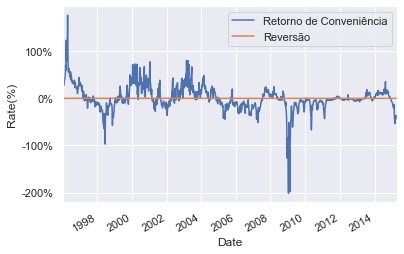

In [53]:
data['Reversao']=y_barra

data['Y'].plot()
data['Reversao'].plot()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Rate(%)')
plt.legend(('Retorno de Conveniência','Reversão'))
plt.show()

In [54]:
################Simulação################

In [55]:
def simulacao(y0,kappa,y_barra,sigma,T,delta_t):
    Po=y0
    serie=[]
    Tempo=[]
    serie.append(Po)
    Tempo.append(0)
    for t in range(int(T/delta_t)):
        P1= Po*np.exp(-kappa*delta_t*(t+1)) + y_barra*(1-np.exp(-kappa*delta_t*(t+1)))
        serie.append(P1)
        Tempo.append((t+1)*delta_t)
    df=pd.DataFrame(serie)
    df.columns=['Average_Rate']
    
    for i in range(len(Tempo)):
        Tempo[i] == round(i,0) #tries to round all numbers.
        
    #df=pd.DataFrame(Tempo)
    df.index=Tempo
    #df.columns=['Price_Average']
    #df['Price_Average']=0
    
    
    for i in range(3):
        Po=y0
        serie=[]
        serie.append(Po)
        for t in range(int(T/delta_t)):
            #P1= np.exp(kappa*delta_t)*Po + y_barra*(1- np.exp(kappa*delta_t)) + sigma*np.random.normal(0,1)*np.sqrt(np.exp(2*kappa*delta_t)/(2*kappa))            
            P1 = np.exp(-kappa*delta_t)*Po + y_barra*(1- np.exp(-kappa*delta_t)) + sigma*np.random.normal(0,1)*np.sqrt((1- np.exp(-2*kappa*delta_t))/(2*kappa))
            serie.append(P1)
            Po=P1
        df['P_{}'.format(i)]=serie
        
    return[df.plot(legend=False),df.Average_Rate.plot(color='black', legend=True),plt.gca().yaxis.set_major_formatter(PercentFormatter(1)),plt.ylabel('Rate(%)'), plt.xlabel('Anos')]
    
       

In [56]:
data['Y'][0], kappa, y_barra,sigma,20,delta_t

(0.3605554666097661,
 5.518304844807468,
 0,
 0.8673550834121311,
 20,
 0.019230769230769232)

In [57]:
####Meia vida###
print(-np.log(0.5)/kappa)
print ('A meia vida é:', -12*np.log(0.5)/kappa, 'mes(es)')

0.12560871500460374
A meia vida é: 1.5073045800552447 mes(es)


In [58]:
y0=data['Y'][0]

In [59]:
Po=y0
P1=[]
serie=[]
for t in range(int(20/delta_t)):
    P1 = np.exp(-kappa*delta_t)*Po + y_barra*(1- np.exp(-kappa*delta_t)) + sigma*np.random.normal(0,1)*np.sqrt((1- np.exp(-2*kappa*delta_t))/(2*kappa))        
    serie.append(P1)
    Po=P1
        

[]

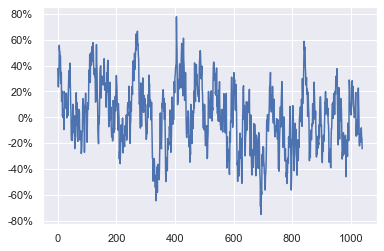

In [60]:
plt.plot(serie)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.plot()

In [61]:
Po=y0
serie=[]
Tempo=[]
serie.append(Po)
Tempo.append(0)
for t in range(int(20/delta_t)):
    P1= Po*np.exp(-kappa*delta_t*(t+1)) + y_barra*(1-np.exp(-kappa*delta_t*(t+1)))
    serie.append(P1)
    Tempo.append((t+1)*delta_t)
df=pd.DataFrame(serie)
df.columns=['Average_Rate']
    

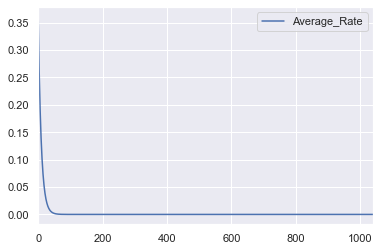

In [62]:
df.plot()

 None,
 Text(0, 0.5, 'Rate(%)'),
 Text(0.5, 0, 'Anos')]

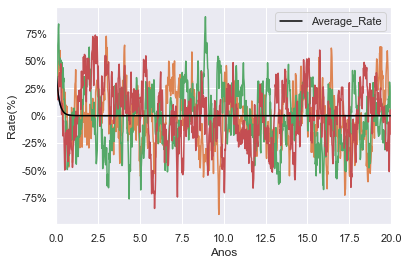

In [63]:
simulacao(y0,kappa,y_barra,sigma,20,delta_t)

In [64]:
y_barra

0

In [65]:
#######Estrutura a termo da Volatilidade - Efeito Samuleson - Exercicio 5#####

In [66]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F15,F16,F17,F18,F19,F20,Y,Y_diff,Y_shift,Reversao
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-03,19.89,19.34,18.90,18.58,18.35,18.16,18.01,17.92,17.84,17.77,...,17.54,17.50,17.46,17.43,17.40,17.38,0.360555,NaN,NaN,0
1996-01-10,19.67,19.18,18.78,18.47,18.24,18.06,17.91,17.82,17.74,17.66,...,17.45,17.41,17.37,17.34,17.32,17.30,0.326775,-0.033780,0.360555,0
1996-01-17,18.52,18.05,17.79,17.60,17.45,17.35,17.27,17.21,17.16,17.11,...,16.97,16.94,16.93,16.92,16.91,16.91,0.332523,0.005748,0.326775,0
1996-01-23,18.06,17.67,17.47,17.32,17.22,17.15,17.09,17.04,16.99,16.94,...,16.82,16.81,16.80,16.79,16.79,16.81,0.286031,-0.046491,0.332523,0
1996-01-24,18.28,17.88,17.67,17.52,17.41,17.32,17.26,17.20,17.14,17.08,...,16.96,16.95,16.94,16.93,16.93,16.94,0.289554,0.003522,0.286031,0


In [67]:
np.std(np.log(data['F1']).diff())

0.044478011018226175

In [68]:
np.std(np.log(data['F1']) - np.log(data['F1']).shift(-1) )

0.044478011018226175

In [69]:
print(np.std(np.log(data['F1']).diff()))
print(np.std(np.log(data['F20']).diff()))

0.044478011018226175
0.02713312056627225


In [70]:
termo=[]
for i in range(20):
    termo.append(100*np.std(np.log(data['F{}'.format(i+1)]).diff()))

In [71]:
print(termo[0])
print(termo[19])

4.447801101822617
2.7133120566272253


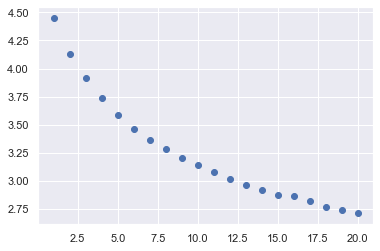

In [72]:
plt.scatter(np.linspace(1,20,20),termo)

In [73]:
termo

[4.447801101822617,
 4.1335197481932635,
 3.911601704385803,
 3.7337815278288757,
 3.5868621409435133,
 3.464799995982472,
 3.364920905605901,
 3.279881545811242,
 3.2050793159166933,
 3.1371942808393527,
 3.0742703032105045,
 3.0173466052116273,
 2.9659612043518364,
 2.91826559998083,
 2.875867607710965,
 2.860754352156289,
 2.8234600608188263,
 2.768323308758567,
 2.741132182879684,
 2.7133120566272253]

In [74]:
np.mean(r -12*np.log(data.F2/data.F1))

0.007599920496877612

In [75]:
#####Estrutura a termo da taxa de conveniência
termo_delta=[]
for i in range(19):
    termo_delta.append(100*np.mean(r -12*np.log(data['F{}'.format(i+2)]/data['F{}'.format(i+1)])))



In [76]:
termo_delta

[0.7599920496877612,
 2.990302682235255,
 4.412421160386808,
 5.044245741394024,
 5.465773846640308,
 5.736493285254469,
 5.78244132473754,
 5.719225912107543,
 5.629258278593108,
 5.528080082236038,
 5.475221948653464,
 5.4082058089119345,
 5.3359221412228885,
 5.192917400632241,
 5.120721393961397,
 4.913720203016739,
 4.687485371912428,
 4.795738570137225,
 4.055984462113519]

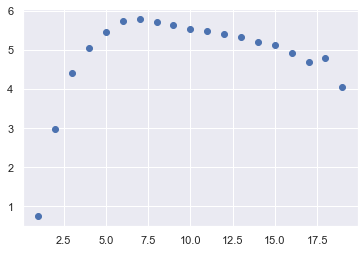

In [77]:
plt.scatter(np.linspace(1,19,19),termo_delta)

In [78]:
np.mean(termo_delta)

4.844955350728141

In [79]:
termo_delta_0=[]
for i in range(19):
    termo_delta_0.append(100*np.mean(r -(12/(i+1))*np.log(data['F{}'.format(i+2)]/data['F1'])))
    



In [80]:
termo_delta_0

[0.7599920496877612,
 1.8751473659614968,
 2.7209052974366115,
 3.3017404084259643,
 3.73454709606883,
 4.068204794266432,
 4.313095727190873,
 4.488862000305458,
 4.615572697892972,
 4.706823436327272,
 4.776677846538748,
 4.829305176736519,
 4.868275712466236,
 4.891464404478098,
 4.906748203776993,
 4.907183953729468,
 4.894260507740234,
 4.8887870667622835,
 4.84495535072814]

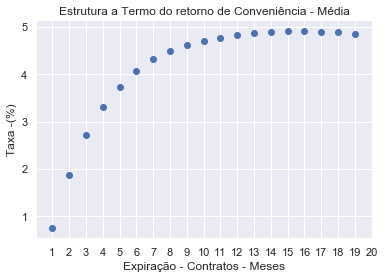

In [83]:
plt.scatter(np.linspace(1,19,19),termo_delta_0)
sns.despine(left=True)
plt.xlabel('Expiração - Contratos - Meses')
plt.ylabel('Taxa -(%)')
plt.title('Estrutura a Termo do retorno de Conveniência - Média')
plt.xticks(np.arange(1,21,1));

In [38]:
####Aproximando CL1 -F1 ao spot - Dado Semanal

vol=np.std(data.F1.pct_change(1))*np.sqrt(52)
print(vol*100)
alpha=(np.mean(data.F1.pct_change(1))+.5*np.power(np.std(data.F1.pct_change(1)),2))*52
print(alpha*100)

32.0736774921536
14.285041420714306


In [64]:
data['Value_Shift']=data['F1'].shift(1)
data['lnSt']= np.log(data['F1'])
data['lnSt_1']= np.log(data['Value_Shift'])
data['lnStSt_1']= data['lnSt'] -data['lnSt_1'] 

In [65]:
print('vol é',100*np.std(data.lnStSt_1)*np.sqrt(52))
print('alpha é',100*(((np.mean(data.lnStSt_1)+ 0.5*np.std(data.lnStSt_1)**2)*52)))


vol é 32.073549871373345
alpha é 9.143128662789103


In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
adfuller(data.F1)[1]
#não pode descartar  h0 (MGB)

0.22077488323322575

In [67]:
############Dado WTI - IEA - Spot########


In [119]:
#Importar o arquivo salva em csv
WTI_spot=pd.read_excel('wti_spot_eia_week.xls',index_col=0)
WTI_spot.head()

,WTI
Date,
1986-01-03,25.78
1986-01-10,25.99
1986-01-17,24.57
1986-01-24,20.31
1986-01-31,19.69


In [120]:
WTI_spot.index

DatetimeIndex(['1986-01-03', '1986-01-10', '1986-01-17', '1986-01-24',
               '1986-01-31', '1986-02-07', '1986-02-14', '1986-02-21',
               '1986-02-28', '1986-03-07',
               ...
               '2020-07-17', '2020-07-24', '2020-07-31', '2020-08-07',
               '2020-08-14', '2020-08-21', '2020-08-28', '2020-09-04',
               '2020-09-11', '2020-09-18'],
              dtype='datetime64[ns]', name='Date', length=1812, freq=None)

In [121]:
print('Média de dias é:', np.mean(WTI_spot.index.to_series().diff()))

Média de dias é: 7 days 00:00:00


In [122]:
WTI_spot=WTI_spot['1996':'2015-05-01']

In [123]:
WTI_spot.head(-1)

,WTI
Date,
1996-01-05,19.99
1996-01-12,19.43
1996-01-19,18.64
1996-01-26,18.35
1996-02-02,17.64
...,...
2015-03-27,48.68
2015-04-03,48.91
2015-04-10,51.78


In [124]:
data.head(-1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,Y,Y_diff,Y_shift,Reversao,Value_Shift,lnSt,lnSt_1,lnStSt_1
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-03,19.89,19.34,18.90,18.58,18.35,18.16,18.01,17.92,17.84,17.77,...,17.40,17.38,0.360555,NaN,NaN,0,NaN,2.990217,NaN,NaN
1996-01-10,19.67,19.18,18.78,18.47,18.24,18.06,17.91,17.82,17.74,17.66,...,17.32,17.30,0.326775,-0.033780,0.360555,0,19.89,2.979095,2.990217,-0.011122
1996-01-17,18.52,18.05,17.79,17.60,17.45,17.35,17.27,17.21,17.16,17.11,...,16.91,16.91,0.332523,0.005748,0.326775,0,19.67,2.918851,2.979095,-0.060243
1996-01-23,18.06,17.67,17.47,17.32,17.22,17.15,17.09,17.04,16.99,16.94,...,16.79,16.81,0.286031,-0.046491,0.332523,0,18.52,2.893700,2.918851,-0.025152
1996-01-24,18.28,17.88,17.67,17.52,17.41,17.32,17.26,17.20,17.14,17.08,...,16.93,16.94,0.289554,0.003522,0.286031,0,18.06,2.905808,2.893700,0.012108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-25,51.53,53.23,54.55,55.74,56.83,57.76,58.46,59.07,59.64,60.12,...,62.92,63.13,-0.365440,0.071831,-0.437270,0,50.52,3.942164,3.922369,0.019795
2015-04-01,50.76,52.55,53.99,55.25,56.34,57.24,57.91,58.51,59.07,59.53,...,62.30,62.53,-0.391821,-0.026382,-0.365440,0,51.53,3.927109,3.942164,-0.015056
2015-04-08,49.93,51.76,53.40,54.75,55.93,56.87,57.58,58.21,58.80,59.26,...,62.30,62.54,-0.407891,-0.016070,-0.391821,0,50.76,3.910622,3.927109,-0.016487


In [125]:
####Aproximando Spot - Dado Semanal -EIA

vol_spot=np.std(WTI_spot.pct_change(1))*np.sqrt(52)
print(vol_spot*100)
alpha_spot=(np.mean(WTI_spot.pct_change(1))+.5*np.power(np.std(WTI_spot.pct_change(1)),2))*52
print(alpha_spot*100)

WTI    31.113828
dtype: float64
WTI    15.181504
dtype: float64


In [126]:
WTI_spot['Value_Shift']=WTI_spot['WTI'].shift(1)
WTI_spot['lnSt']= np.log(WTI_spot['WTI'])
WTI_spot['lnSt_1']= np.log(WTI_spot['Value_Shift'])
WTI_spot['lnStSt_1']= WTI_spot['lnSt'] -WTI_spot['lnSt_1'] 

In [127]:
print('vol é',100*np.std(WTI_spot.lnStSt_1)*np.sqrt(52))
print('alpha é',100*(((np.mean(WTI_spot.lnStSt_1)+ 0.5*np.std(WTI_spot.lnStSt_1)**2)*52)))


vol é 31.152166169335832
alpha é 10.345643505350676


In [129]:
adfuller(WTI_spot.WTI)[1]
#não pode descartar  h0 (MGB)

0.21149608292158534

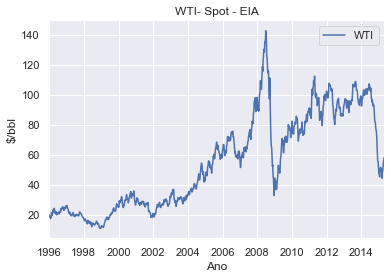

In [145]:
WTI_spot['WTI'].plot()
sns.despine(left=True)
plt.xlabel('Ano')
plt.ylabel('$/bbl')
plt.title('WTI- Spot - EIA')

plt.legend(['WTI'])

Text(0.5, 1.0, 'WTI- Futuro')

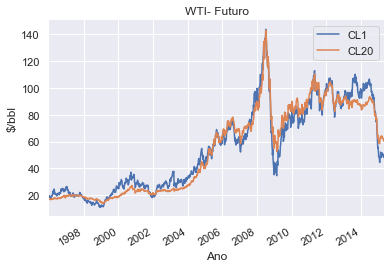

In [148]:
data['F1'].plot()
data['F20'].plot()
sns.despine(left=True)
plt.xlabel('Ano')
plt.legend(['CL1','CL20'])
plt.ylabel('$/bbl')
plt.title('WTI- Futuro')

In [167]:
termo_vol_0=[]
for i in range(20):
    termo_vol_0.append(100*np.std(data['F{}'.format(i+1)].pct_change(1))*np.sqrt(52))
    print(i+1)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [168]:
termo_vol_0

[32.0736774921536,
 29.814369995336303,
 28.20378021669105,
 26.92352416914552,
 25.863500954546677,
 24.984914232518385,
 24.26645001422937,
 23.655293222997503,
 23.11387912800214,
 22.62224487419142,
 22.166952350134775,
 21.757098341972082,
 21.387688980569916,
 21.044555371134845,
 20.738908994881786,
 20.62768886647883,
 20.358761345167157,
 19.962914605041927,
 19.76789342869561,
 19.5666349176928]

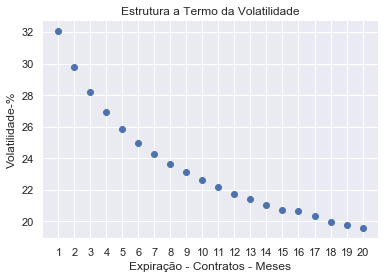

In [172]:
plt.scatter(np.linspace(1,20,20),termo_vol_0)
sns.despine(left=True)
plt.xlabel('Expiração - Contratos - Meses')
plt.ylabel('Volatilidade-%')
plt.title('Estrutura a Termo da Volatilidade')
plt.xticks(np.arange(1,21,1));

In [170]:
len(termo_vol_0)

20

In [116]:
def reversao(i):
    data['Y']=r -(12/(i+1))*np.log(data['F{}'.format(i+2)]/data.F1)
    data['Y_diff']=data['Y'].diff(1)
    data['Y_shift']=data['Y'].shift(1)
    results=smf.ols(formula = "Y_diff ~ Y_shift", data=data, missing='drop').fit()
    print(i+2)
    print(round(results.pvalues[0],2))
    #delta_t=1/52 #medida anual
    a=results.params[0]
    b=results.params[1]
    y_barra=a/-b
    
    return[y_barra*100]

In [117]:
termo_delta_y_barra=[]
for i in range(19):
    termo_delta_y_barra.append(reversao(i))
    #print(i+2)


2
0.96
3
0.78
4
0.64
5
0.56
6
0.5
7
0.45
8
0.42
9
0.39
10
0.37
11
0.35
12
0.34
13
0.32
14
0.31
15
0.3
16
0.28
17
0.27
18
0.26
19
0.25
20
0.25


In [126]:
termo_delta_y_barra

[[0.1515890403067151],
 [1.0137386993497957],
 [1.7090947221113342],
 [2.184340334084793],
 [2.553939269527917],
 [2.8504004257601943],
 [3.080468925260778],
 [3.243451890521263],
 [3.3716562666932868],
 [3.4757461713005977],
 [3.56131669594864],
 [3.6311723928750315],
 [3.686533383124211],
 [3.729900888871142],
 [3.7800085034476716],
 [3.8041647527830658],
 [3.809810364080568],
 [3.830828654842368],
 [3.8089814226738157]]

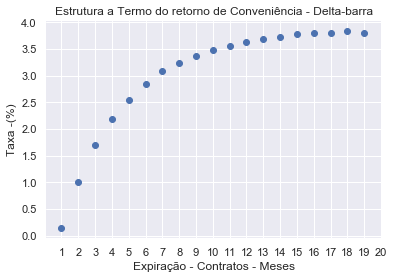

In [125]:
plt.scatter(np.linspace(1,19,19),termo_delta_y_barra)
sns.despine(left=True)
plt.xlabel('Expiração - Contratos - Meses')
plt.ylabel('Taxa -(%)')
plt.title('Estrutura a Termo do retorno de Conveniência - Delta-barra')
plt.xticks(np.arange(1,21,1));

In [ ]:
#####################Avaliação da Taxa de Juros##############3
####  https://fred.stlouisfed.org/series/DGS20 #####


In [7]:
DGS20=pd.read_excel('DGS20.xls',index_col=0)

[]

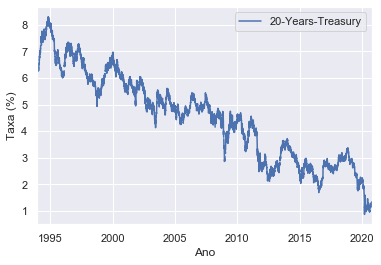

In [12]:
sns.set(style="darkgrid")
DGS20.plot()
plt.legend(('20-Years-Treasury','FRED'))
plt.ylabel('Taxa (%)')
plt.xlabel('Ano')
#plt.xticks(rotation=45)
plt.plot()


In [8]:
DGS20

,DGS20
Date,
1993-12-13,6.40
1993-12-14,6.46
1993-12-15,6.46
1993-12-16,6.47
1993-12-17,6.44


In [ ]:
r_longo

In [24]:
np.mean(DGS20['2010':'2016'])[0]/100

0.030211472602739695

In [ ]:
r=np.mean(DGS3['1996':'2016'])[0]/100
